# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [80]:
# student 1: kfir 8044
# student 2: igal 2817

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [81]:
# Install the necessary libraries (if not already installed)
!pip install pandas matplotlib seaborn

# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
# Load the train and test datasets
trainFilePath = 'DB/cancer_train.csv'
testFilePath = 'DB/cancer_test.csv'

# Load the train and test datasets
train = pd.read_csv(trainFilePath)
test = pd.read_csv(testFilePath)

In [83]:
# Display the first 5 rows of each dataset
print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())

Train Data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0 

In [84]:
# Display Basic Statistics
statistics = train.describe()
print(statistics)


       mean radius  mean texture  mean perimeter    mean area  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.257910     19.482835       92.876220   668.580440   
std       3.613344      4.261633       24.922646   364.587131   
min       6.981000     10.380000       43.790000   143.500000   
25%      11.725000     16.390000       75.265000   422.300000   
50%      13.460000     19.020000       87.160000   559.200000   
75%      16.150000     21.960000      106.850000   807.450000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096224          0.105452        0.090853             0.050013   
std           0.013793          0.053892        0.081118             0.039727   
min           0.052630          0.019380        0.000000             0.000000   
25%      

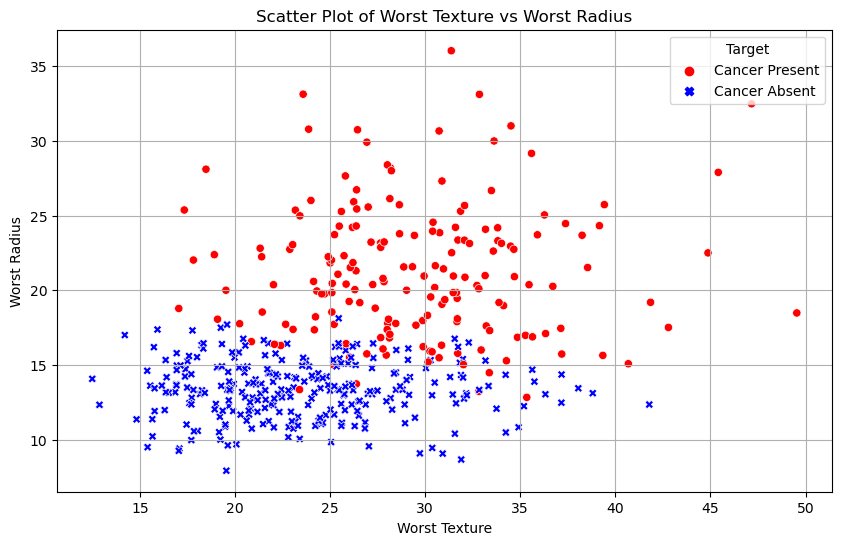

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='worst texture', 
    y='worst radius', 
    hue='target', 
    palette={0: 'red', 1: 'blue'}, 
    style='target', 
    data=train
)

# Adding titles and labels
plt.title('Scatter Plot of Worst Texture vs Worst Radius')
plt.xlabel('Worst Texture')
plt.ylabel('Worst Radius')

# Adjust legend
handles, labels = plt.gca().get_legend_handles_labels()
# Reorder legend entries
handles, labels = zip(*sorted(zip(handles, labels), key=lambda x: int(x[1])))
plt.legend(handles, ['Cancer Present', 'Cancer Absent'], title='Target')

plt.grid(True)

# Show the plot
plt.show()

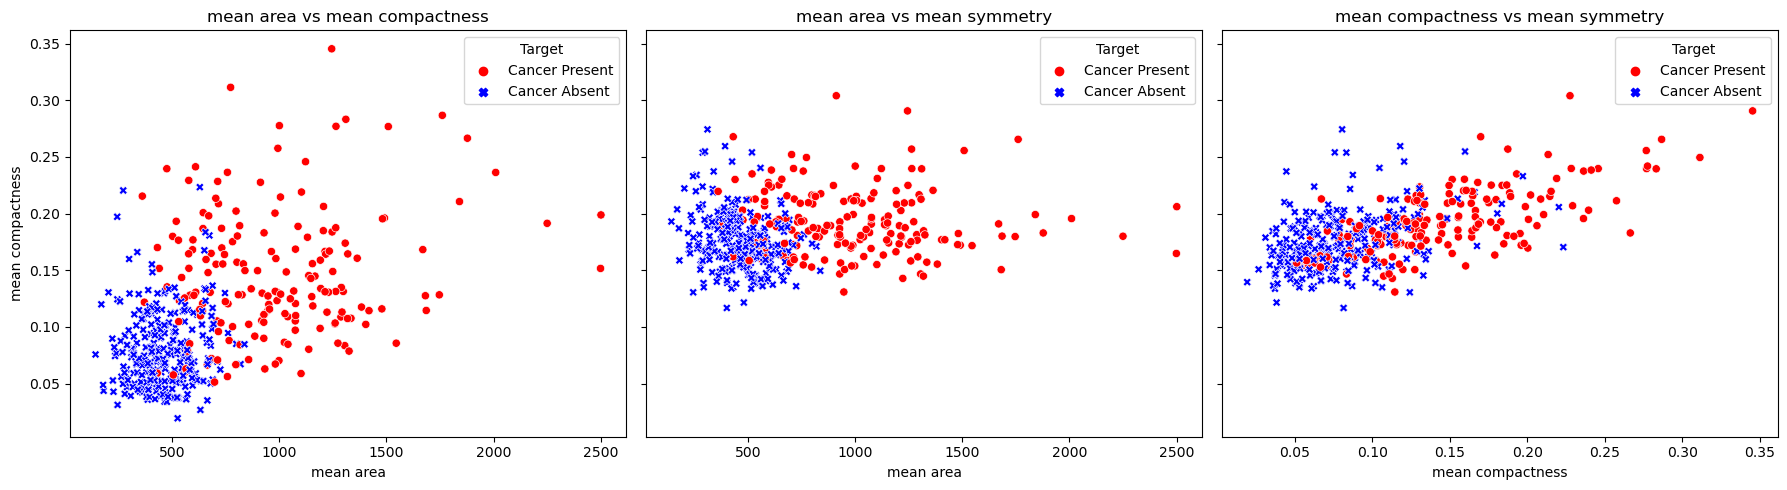

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Scatter plot of feature1 vs feature2
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='target',
    palette={0: 'red', 1: 'blue'},
    style='target',
    data=train,
    ax=axs[0]
)
axs[0].set_title('mean area vs mean compactness')
axs[0].set_xlabel('mean area')
axs[0].set_ylabel('mean compactness')

# Scatter plot of feature1 vs feature3
sns.scatterplot(
    x='mean area',
    y='mean symmetry',
    hue='target',
    palette={0: 'red', 1: 'blue'},
    style='target',
    data=train,
    ax=axs[1]
)
axs[1].set_title('mean area vs mean symmetry')
axs[1].set_xlabel('mean area')
axs[1].set_ylabel('mean symmetry')

# Scatter plot of feature2 vs feature3
sns.scatterplot(
    x='mean compactness',
    y='mean symmetry',
    hue='target',
    palette={0: 'red', 1: 'blue'},
    style='target',
    data=train,
    ax=axs[2]
)
axs[2].set_title('mean compactness vs mean symmetry')
axs[2].set_xlabel('mean compactness')
axs[2].set_ylabel('mean symmetry')

# Adjust the legend
handles, labels = axs[0].get_legend_handles_labels()
# Reorder legend entries
handles, labels = zip(*sorted(zip(handles, labels), key=lambda x: int(x[1])))
axs[0].legend(handles, ['Cancer Present', 'Cancer Absent'], title='Target', loc='best')
axs[1].legend(handles, ['Cancer Present', 'Cancer Absent'], title='Target', loc='best')
axs[2].legend(handles, ['Cancer Present', 'Cancer Absent'], title='Target', loc='best')

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [87]:
# Import Required Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, accuracy_score


In [88]:
#Load Data
X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test.drop('target', axis=1)
y_test = test['target']

#Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [89]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [90]:
#Feature Engineering

from sklearn.preprocessing import PolynomialFeatures

#Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Use X_train_poly and X_test_poly in the following steps

In [91]:
#Define Models and Hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()  # Initialize KNN here
}
param_grid = {
    'Decision Tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

In [92]:
#Grid Search with Cross-Validation
# Initialize an empty list to collect results
results = []

# Iterate through each model and hyperparameters
for model_name, model in models.items():
    # Set up Grid Search
    grid_search = GridSearchCV(model, param_grid[model_name], cv=15, scoring='f1_macro', return_train_score=False)
    
    # Fit the model with Grid Search
    grid_search.fit(X_train_poly, y_train)  # Ensure to use the engineered features here
    
    # Get all results from the grid search
    for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
        results.append({
            'Model': model_name,
            'Hyperparameters': params,
            'Cross-Validation Score': mean_score
        })

# Create a DataFrame from the collected results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Model,Hyperparameters,Cross-Validation Score
0,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.927758
1,Decision Tree,"{'max_depth': 3, 'min_samples_split': 5}",0.923244
2,Decision Tree,"{'max_depth': 3, 'min_samples_split': 10}",0.918550
3,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.916987
4,Decision Tree,"{'max_depth': 5, 'min_samples_split': 5}",0.923866
5,Decision Tree,"{'max_depth': 5, 'min_samples_split': 10}",0.923838
6,Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.930899
7,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.926358
8,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.921352
9,KNN,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.909657


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [93]:
best_result = results_df.loc[results_df['Cross-Validation Score'].idxmax()]
print("Best Result:")
print(best_result)

Best Result:
Model                                                 Decision Tree
Hyperparameters           {'max_depth': 10, 'min_samples_split': 2}
Cross-Validation Score                                     0.930899
Name: 6, dtype: object


In [94]:
# Extract model name and hyperparameters
best_model_name = best_result['Model']
best_hyperparams = best_result['Hyperparameters']

In [95]:
# Initialize the best model with the best hyperparameters
best_model = models[best_model_name].__class__(**best_hyperparams)

# Fit the model with the entire training set
best_model.fit(X_train_poly, y_train)

DecisionTreeClassifier(max_depth=10)

## Part 5 - Apply on test and show model performance estimation

In [96]:
# Make Predictions on the Test Set
X_test_poly = poly.transform(X_test_scaled) 
predictions = best_model.predict(X_test_poly)

# Display Predictions
predictions_df = pd.DataFrame(predictions, columns=['Predicted Class'])
predictions_df['Target Class'] = test['target'].values

In [97]:
print(predictions_df.head())

   Predicted Class  Target Class
0                0             1
1                1             1
2                0             0
3                1             1
4                1             1


In [98]:
# Calculate Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.96      0.95      0.96        80

    accuracy                           0.94       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 93.86%
